##**Equinox **  

Liu Kaiyuan & Wu Jiaming | MCS231020 & MCS221033

Dataset link:https://www.kaggle.com/datasets/forgemaster/steam-reviews-dataset?select=reviews-1230-2345.csv

**About Dataset**

This dataset contains a collection of user reviews of video games in the Steam Store with a plethora of information about each review such as steam id, app id, playtime, the review text, like/dislike, timestamp of review created, timestamp of review updated, etc, scraped from the STEAM API. (https://partner.steamgames.com/doc/store/getreviews)

All information gathered here is publicly available, and no registration for API key was required for accessing the data.

## Loading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d forgemaster/steam-reviews-dataset
! unzip steam-reviews-dataset

 99% 1.92G/1.93G [00:24<00:00, 142MB/s]
100% 1.93G/1.93G [00:24<00:00, 84.2MB/s]
Archive:  steam-reviews-dataset.zip
  inflating: reviews-1-115.csv       
  inflating: reviews-11265-13495.csv  
  inflating: reviews-115-1230.csv    
  inflating: reviews-1230-2345.csv   
  inflating: reviews-13495-13500.csv  
  inflating: reviews-13500-13537.csv  
  inflating: reviews-13537-27075.csv  
  inflating: reviews-2345-4575.csv   
  inflating: reviews-4575-6805.csv   
  inflating: reviews-6805-9035.csv   
  inflating: reviews-9035-11265.csv  


In [4]:
import pandas as pd
import numpy as np

# reading the companies_sorted csv file
df = pd.read_csv("/content/reviews-1230-2345.csv")
df

,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
0,76561199012934585,204100,True,0,0,0.000000,1671,1660,37,10,A masterpiece that is extremely underrated. Th...,1619063926,1619063926
1,76561198123483551,204100,True,0,0,0.000000,3143,3143,83,14,Amazing!!!,1619062713,1619062713
2,76561197993895820,204100,False,1,0,0.000000,787,746,123,2,The latest update forces the install of some R...,1619058151,1619058151
3,76561197972464391,204100,True,0,0,0.000000,1012,1006,191,20,Classic Payne\n,1619052527,1619052527
4,76561198242204348,204100,True,0,0,0.000000,414,414,54,28,Not like 1 and 2 of the series but its alright.,1619047384,1619047384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067676,76561198014752589,266190,True,33,3,0.571717,150,140,45,2,Ther game is fun. The building system is diffe...,1451254815,1451254815
3067677,76561197997328781,266190,True,5,0,0.483226,17,17,605,52,It's not like I don't see what you're going fo...,1448685112,1448685165
3067678,76561197980157613,266190,False,21,7,0.473769,14,14,217,36,This game is fairly pretty but at this point s...,1447780638,1447780664
3067679,76561198027695358,266190,False,13,6,0.412072,9,9,369,5,I'll be honest and say I played this game for ...,1447705488,1447705488


In [5]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067681 entries, 0 to 3067680
Columns: 13 entries, steamid to unix_timestamp_updated
dtypes: bool(1), float64(1), int64(10), object(1)
memory usage: 1.2 GB


## RAM usage and reading time of original data

In [6]:
!pip install psutil
!pip install memory-profiler

In [7]:
import time
import psutil

# Calculate Processing time
start_time = time.time()

df= pd.read_csv("/content/reviews-1230-2345.csv")

end_time = time.time()

print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

Processing Time: 34.46 seconds
CPU Usage: 3.5%
Memory Usage: 33.0%
System RAM Usage: 33.0%


This is the time it would take to load the original data set directly, and it will become the baseline for comparison.

## First strategie:Load Less Data

In the original data set, there are many 0 values in the **weighted_vote_score** column, and the corresponding calculation method is not given. We have no way of knowing how it works, so this column does not need to be loaded.

In addition, knowing another player's ID and current play time is not very helpful in recommending games, so we will not load the **steamid** and **playtime_forever** columns.

In [8]:
# Record start time
start_time = time.time()

# Load csv without weighted_vote_score,steamid,playtime_forever columns
req_cols = ['appid', 'voted_up', 'votes_up', 'votes_funny',
       'playtime_at_review',
       'num_games_owned', 'num_reviews', 'review', 'unix_timestamp_created',
       'unix_timestamp_updated']
df_load = pd.read_csv("/content/reviews-1230-2345.csv",  usecols=req_cols)

# Record end time
end_time = time.time()

print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

Processing Time: 27.21 seconds
CPU Usage: 3.0%
Memory Usage: 41.4%
System RAM Usage: 41.4%


As we can see, by applying the strategy of reducing data loading, the data loading time has been reduced from 34.46 seconds to 27.21 seconds.

## Second strategie:Use Chunking

When dealing with some data that is too large to load, it is a good idea to load it in chunks and then process it.

In [9]:
# Number of data in the dataset
len(df)

3067681

After knowing the number of entries in the data set, divide the original data set into several blocks, each block containing 100,000 pieces of data

In [10]:
import gc

chunk_size = 100000
df_chunks = pd.read_csv("/content/reviews-1230-2345.csv",chunksize=chunk_size)

num = 0
for chunk in df_chunks:
  num+=1
  chunk.to_csv("chunk" + str(num) + ".csv",index=False)
  gc.collect()

num

31

We can see that the original data set is divided into 31 sub-data sets

In [11]:
import random

# Get a munber from 1 to 31
random_number = random.randint(1, num)

# Record start time
start_time = time.time()

chunks = pd.read_csv("chunk" + str(random_number) + ".csv")

# Record end time
end_time = time.time()

print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")
chunks.head()

Processing Time: 0.58 seconds
CPU Usage: 61.8%
Memory Usage: 41.8%
System RAM Usage: 41.8%


,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
0,76561198141874147,263280,True,12,0,0.607247,21499,21225,36,6,353 hours later- still not bored,1595038794,1595038794
1,76561199004364857,263280,True,0,0,0.000000,2225,538,6,3,something to do if you get bored,1595021321,1595021321
2,76561199013586132,263280,True,0,0,0.000000,2825,855,25,2,good game,1595010731,1595010731
3,76561198012966253,263280,True,0,0,0.000000,7208,4822,102,5,"""Why the Hell is the trailer stuck on a tree?!...",1594973284,1594973284
4,76561198282503397,263280,True,0,0,0.491071,9275,9118,8,2,yes,1594937220,1594937220


At this time, it only takes 0.58 seconds to load one of the 31 sub-datasets! This significantly reduces load time compared to loading the entire original dataset

## Third strategie:Optimize Data Types

In [12]:
df.dtypes

steamid                     int64
appid                       int64
voted_up                     bool
votes_up                    int64
votes_funny                 int64
weighted_vote_score       float64
playtime_forever            int64
playtime_at_review          int64
num_games_owned             int64
num_reviews                 int64
review                     object
unix_timestamp_created      int64
unix_timestamp_updated      int64
dtype: object

In [13]:
# Selecting only numeric columns (integers and floats)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Finding the maximum value for each numeric column
max_values = numeric_columns.max()

print("Maximum values for each numeric column:")
print(max_values)

Maximum values for each numeric column:
steamid                   7.656120e+16
appid                     2.661900e+05
votes_up                  2.821600e+04
votes_funny               4.294967e+09
weighted_vote_score       9.798331e-01
playtime_forever          3.276720e+06
playtime_at_review        2.580531e+06
num_games_owned           2.401300e+04
num_reviews               5.236000e+03
unix_timestamp_created    1.619083e+09
unix_timestamp_updated    1.619083e+09
dtype: float64


We can see that there are 10 columns of int64 type in the original data set. However, columns such as steamid and appid do not use numeric attributes. For columns such as playtime, the range that the int64 type can represent far exceeds the needs of the original data.

In [14]:
from sys import getsizeof
# The size of the original data set
start_size = getsizeof(df)/(1024.0**3)
print('Dataframe size: %2.2f GB'%start_size)

Dataframe size: 1.23 GB


In [15]:
df_change_type = df.copy()

df_change_type.appid = df_change_type.appid.astype('uint32')
df_change_type.votes_up = df_change_type.votes_up.astype('uint32')
df_change_type.votes_funny = df_change_type.votes_funny.astype('uint32')
df_change_type.playtime_forever = df_change_type.playtime_forever.astype('uint32')
df_change_type.playtime_at_review = df_change_type.playtime_at_review.astype('uint32')
df_change_type.num_games_owned = df_change_type.num_games_owned.astype('uint16')
df_change_type.num_reviews = df_change_type.num_reviews.astype('uint16')
df_change_type.unix_timestamp_created = df_change_type.unix_timestamp_created.astype('uint32')
df_change_type.unix_timestamp_updated = df_change_type.unix_timestamp_updated.astype('uint32')

df_change_type.head()

,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
0,76561199012934585,204100,True,0,0,0.0,1671,1660,37,10,A masterpiece that is extremely underrated. Th...,1619063926,1619063926
1,76561198123483551,204100,True,0,0,0.0,3143,3143,83,14,Amazing!!!,1619062713,1619062713
2,76561197993895820,204100,False,1,0,0.0,787,746,123,2,The latest update forces the install of some R...,1619058151,1619058151
3,76561197972464391,204100,True,0,0,0.0,1012,1006,191,20,Classic Payne\n,1619052527,1619052527
4,76561198242204348,204100,True,0,0,0.0,414,414,54,28,Not like 1 and 2 of the series but its alright.,1619047384,1619047384


In [16]:
print('Dataframe size: %2.2f GB'%(getsizeof(df_change_type)/(1024.0**3)))

Dataframe size: 1.11 GB


We can see that the size of the data set has been reduced from 1.23GB to 1.11GB. Although it does not seem to be reduced much, this is also related to the characteristics of the data set. If you apply it to a data set with relatively small data size, I think the effect will be much better.

## Fourth strategie:Sampling

In fact, the tip of the iceberg of a large data set is enough to support most of our needs, and we don't always need to load the entire data set.

In [17]:
n = len(df)
s = n//1000  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header

# Record start time
start_time = time.time()

df_samping = pd.read_csv("/content/reviews-1230-2345.csv", skiprows=skip)

# Record end time
end_time = time.time()

print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")



Processing Time: 9.94 seconds
CPU Usage: 3.0%
Memory Usage: 44.6%
System RAM Usage: 44.6%


The loading time has been shortened from the original 34.46 seconds to 9.94 seconds. But it did not meet our expectations. We would hope that loading one thousandth of the amount of data only takes one percent of the original loading time or even less. In the end, it only shortened the time by more than half. Although the effect looks good, it pales in comparison to the chunking.

In [18]:
df_samping

,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
0,76561198441790936,204100,True,0,0,0.000000,861,800,18,4,NaN,1611944002,1611944002
1,76561199009299570,204100,True,0,0,0.000000,1125,682,25,11,11 hours is the exact length of the single pla...,1594618421,1594618421
2,76561198051623617,204100,True,0,0,0.000000,946,461,299,53,For anyone whos looking to buy this on sale an...,1575058440,1575058440
3,76561198218263423,204100,True,3,0,0.519616,586,576,348,38,"With its mature story and intense shooting, Ma...",1566357567,1566385986
4,76561198304883665,204100,False,0,0,0.000000,1478,1438,128,21,This is a game with an incredible gameplay loo...,1517888735,1517888735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,76561198014926373,265930,True,1,1,0.517241,454,392,707,16,One day I stumbled across this game in my hast...,1397135778,1397135778
3063,76561198069252778,265930,True,0,0,0.000000,5,5,90,1,So I've only played for about 5 minutes...\n\n...,1396505783,1396505783
3064,76561198220431109,266010,True,1,0,0.500000,33,21,18,6,ez game,1448590067,1448590067
3065,76561197979711669,266010,True,54,3,0.832923,289,289,634,56,A couple of friends recommended this game and ...,1448498133,1448498133


## Fifth strategie:Parallelize with Dask

In [19]:
import dask.dataframe as dd

# Create pandas DataFrame and Dask DataFrame
df_pandas = df.copy()
df_dask = dd.from_pandas(df_pandas, npartitions=8)

**Example 1: Calculate the mean of each numeric column**

In [20]:
# Use pandas first

# Record start time
start_time = time.time()

# Selecting only numeric columns (integers and floats)
numeric_columns = df_pandas.select_dtypes(include=['int64', 'float64'])

# Finding the mean value for each numeric column
mean_values_pandas = numeric_columns.mean()

print("Mean values for each numeric column:")
print(mean_values_pandas)

# Record end time
end_time = time.time()


print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

Mean values for each numeric column:
steamid                   7.656120e+16
appid                     2.358469e+05
votes_up                  2.323969e+00
votes_funny               1.456080e+05
weighted_vote_score       1.942702e-01
playtime_forever          1.356947e+04
playtime_at_review        7.142564e+03
num_games_owned           2.158268e+02
num_reviews               1.757288e+01
unix_timestamp_created    1.501721e+09
unix_timestamp_updated    1.506027e+09
dtype: float64
Processing Time: 0.27 seconds
CPU Usage: 5.0%
Memory Usage: 49.3%
System RAM Usage: 49.3%


In [21]:
# Use Dask

# Record start time
start_time = time.time()

# Selecting only numeric columns (integers and floats)
numeric_columns_dask = df_dask.select_dtypes(include=['int64', 'float64'])

# Finding the mean value for each numeric column
mean_values_dask = numeric_columns_dask.compute().mean()

print("Mean values for each numeric column:")
print(mean_values_dask)

# Record end time
end_time = time.time()


print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

Mean values for each numeric column:
steamid                   7.656120e+16
appid                     2.358469e+05
votes_up                  2.323969e+00
votes_funny               1.456080e+05
weighted_vote_score       1.942702e-01
playtime_forever          1.356947e+04
playtime_at_review        7.142564e+03
num_games_owned           2.158268e+02
num_reviews               1.757288e+01
unix_timestamp_created    1.501721e+09
unix_timestamp_updated    1.506027e+09
dtype: float64
Processing Time: 1.59 seconds
CPU Usage: 91.0%
Memory Usage: 50.0%
System RAM Usage: 50.0%


**Example 2: Filtering data of playtime with more than 1000 hours**

In [22]:
# Use pandas first

# Record start time
start_time = time.time()

# Filter reviews for playtime with more than 1000 hours
Filter_column_pandas = df_pandas[df_pandas['playtime_at_review'] > 1000]

# Record end time
end_time = time.time()


print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

print(f"Filter: \n{Filter_column_pandas}")

Processing Time: 0.33 seconds
CPU Usage: 55.3%
Memory Usage: 51.8%
System RAM Usage: 51.8%
Filter: 
                   steamid   appid  voted_up  votes_up  votes_funny  \
0        76561199012934585  204100      True         0            0   
1        76561198123483551  204100      True         0            0   
3        76561197972464391  204100      True         0            0   
7        76561198011413162  204100     False         1            0   
11       76561198223076240  204100     False         2            1   
...                    ...     ...       ...       ...          ...   
3067604  76561198016139822  266170      True         2            0   
3067606  76561198054678192  266170     False         3            0   
3067615  76561198075664784  266190     False         0            0   
3067640  76561198060506055  266190     False         7            0   
3067658  76561198253477100  266190      True        10            0   

         weighted_vote_score  playtime_forever 

In [23]:
# Use Dask

# Record start time
start_time = time.time()

# Filter reviews for playtime with more than 1000 hours
Filter_column_dask = df_dask[df_dask['playtime_at_review'] > 1000]
Filter_column_dask_result = Filter_column_dask.compute()

# Record end time
end_time = time.time()


print(f"Processing Time: {end_time - start_time:.3f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

print(f"Filter: \n{Filter_column_dask_result}")

Processing Time: 0.422 seconds
CPU Usage: 40.5%
Memory Usage: 54.1%
System RAM Usage: 54.1%
Filter: 
                   steamid   appid  voted_up  votes_up  votes_funny  \
0        76561199012934585  204100      True         0            0   
1        76561198123483551  204100      True         0            0   
3        76561197972464391  204100      True         0            0   
7        76561198011413162  204100     False         1            0   
11       76561198223076240  204100     False         2            1   
...                    ...     ...       ...       ...          ...   
3067604  76561198016139822  266170      True         2            0   
3067606  76561198054678192  266170     False         3            0   
3067615  76561198075664784  266190     False         0            0   
3067640  76561198060506055  266190     False         7            0   
3067658  76561198253477100  266190      True        10            0   

         weighted_vote_score  playtime_forever

**Example 3: Count the number of playtime with more than 1000 hours**

In [24]:
# Use pandas first

# Record start time
start_time = time.time()

# Filter reviews for playtime with more than 1000 hours
counts_pandas = df_pandas[df_pandas['playtime_at_review'] > 1000]['playtime_at_review'].count()

# Record end time
end_time = time.time()


print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

print(f"Counter: {counts_pandas}")

Processing Time: 0.76 seconds
CPU Usage: 63.8%
Memory Usage: 54.5%
System RAM Usage: 54.5%
Counter: 1658816


In [25]:
# Use dask

# Record start time
start_time = time.time()

# Filter reviews for playtime with more than 1000 hours
counts_dask = df_dask[df_dask['playtime_at_review'] > 1000].compute()['playtime_at_review'].count()

# Record end time
end_time = time.time()


print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

print(f"Counter: {counts_pandas}")

Processing Time: 0.38 seconds
CPU Usage: 5.0%
Memory Usage: 54.5%
System RAM Usage: 54.5%
Counter: 1658816


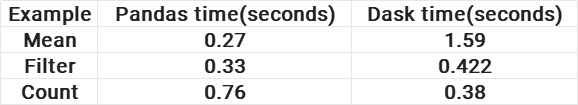

If the data set is small and fits entirely in memory, and the computational task is not very complex, then using Pandas may be simpler and fast enough. However, for large data sets and situations requiring distributed computing, Dask offers better scalability and performance.

##Comparative Analysis

###Load Less Data

1.Memory Efficiency: By loading only the critical portions of the data, significant reductions in memory usage can be achieved. This is crucial for large datasets where attempting to load the entire dataset at once might lead to memory issues, especially in resource-constrained environments.

2.Speed Improvement: Breaking the dataset into smaller chunks and loading only the necessary blocks can reduce the time spent on reading and processing. This often results in overall performance improvements as processing can start without waiting for the entire dataset to be loaded.

3.Storage Space Savings: Loading only a subset of the data can also lead to savings in storage space, particularly for datasets with redundant or unnecessary information.

4.Faster Responsiveness: When dealing with large datasets, loading data incrementally enhances system responsiveness. Users can start viewing and analyzing portions of the data more quickly without waiting for the entire dataset to load.

5.Iteration Processing: Loading data block by block allows for iterative processing, where memory from the previous block can be released while processing the current one, further reducing overall memory requirements.

6.Real-time Data Handling: For streaming or real-time data, a block-wise loading strategy is more suitable as data may arrive sequentially over time rather than being available all at once.

7.Increased Adaptability: The block-wise loading strategy enables handling datasets larger than the available memory, enhancing adaptability to large-scale datasets.

###Use Chunking

1.Memory Efficiency:

(1)Chunking: Divides the data into smaller chunks, processing one part at a time. This reduces memory usage, as only a portion of the data needs to be loaded and processed in memory.\
(2)Traditional Loading: Loading an entire large dataset at once may lead to memory issues. Chunking efficiently avoids this problem.

2.Real-time Processing:

(1)Chunking: Enables processing to start while the data is still being loaded. This is useful for real-time or streaming data processing.\
(2)Traditional Loading: Processing begins only after the entire dataset has been loaded, potentially causing longer wait times.

3.Parallel Processing:

(1)Chunking: Facilitates easier implementation of parallel processing, as each chunk is relatively independent. Different chunks can be processed in parallel on different computing units.\
(2)Traditional Loading: Achieving parallel processing can be more complex when loading the entire dataset, requiring consideration of inter-data dependencies.

4.Adaptability with Iterators:

(1)Chunking: Suitable for iterator patterns, allowing progressive loading and processing of data instead of waiting for the entire dataset to load.\
(2)Traditional Loading: Loading the entire dataset at once may demand substantial memory and may not be well-suited for iterator patterns.

5.Reduced Waiting Time:

(1)Chunking: Results can be generated while processing the first chunk, eliminating the need to wait for the entire process to complete.\
(2)Traditional Loading: Waiting for the entire dataset to load and process is necessary before obtaining the final results.

###Optimize Data Types

1.Memory Efficiency:

(1)Data Type Optimization: By selecting appropriate data types, the memory footprint of variables can be significantly reduced, improving memory efficiency.\
(2)Traditional Without Optimization: Without data type optimization, default data types may be used, leading to higher memory consumption.

2.Performance Improvement:

(1)Data Type Optimization: Employing suitable data types can enhance runtime performance by reducing memory access and improving computational efficiency.\
(2)Traditional Without Optimization: Inappropriate data types may lead to performance degradation due to increased memory access or computational costs.

3.Storage Space Savings:

(1)Data Type Optimization: Choosing compact and appropriately sized data types helps save storage space, especially when dealing with large datasets.\
(2)Traditional Without Optimization: Default data types may occupy more storage space than necessary, resulting in resource wastage.

4.Avoiding Unnecessary Precision:

(1)Data Type Optimization: Selecting the right precision for a specific task helps avoid the use of excessively high-precision data types, reducing memory overhead.\
(2)Traditional Without Optimization: Default behavior might involve higher precision data types than required for the task.

5.Algorithmic Optimization:

(1)Data Type Optimization: The choice of data types can influence algorithm selection, allowing exploitation of the advantages of specific data types to improve algorithm efficiency.\
(2)Traditional Without Optimization: Without considering data types, less efficient algorithms might be chosen.

6.Adapting to Hardware Characteristics:

(1)Data Type Optimization: Considering hardware characteristics, selecting data types that match the underlying hardware architecture can enhance overall performance.\
(2)Traditional Without Optimization: Ignoring hardware characteristics may lead to performance bottlenecks.

###Sampling

1.Computational Efficiency:

(1)Sampling: Working with a subset reduces computational requirements, allowing for quicker analysis and model training.\
(2)Traditional Without Sampling: Analyzing the entire dataset can be computationally expensive and time-consuming.

2.Memory Usage:

(1)Sampling: A smaller subset requires less memory, making it feasible to analyze and process datasets that might be too large to fit into memory.
(2)Traditional Without Sampling: Analyzing the entire dataset may lead to memory issues, especially with large datasets.

3.Exploratory Data Analysis (EDA):

(1)Sampling: Facilitates faster exploratory data analysis by providing a representative view of the data without analyzing the entire dataset.\
(2)Traditional Without Sampling: EDA on the entire dataset may delay the discovery of patterns and trends.

4.Model Training and Validation:

(1)Sampling: Useful for training and validating models on a representative subset, especially when the dataset is large.\
(2)Traditional Without Sampling: Training models on the entire dataset may be time-consuming and computationally intensive.

5.Cost Efficiency:

(1)Sampling: Reduces the cost associated with processing and analyzing the entire dataset.\
(2)Traditional Without Sampling: Analyzing the entire dataset may involve higher costs, particularly in terms of computational resources.

6.Real-time and Streaming Data:

(1)Sampling: Well-suited for real-time and streaming data scenarios where it's impractical to process the entire dataset at once.\
(2)Traditional Without Sampling: Processing entire datasets in real-time might be challenging due to resource constraints.

7.Initial Data Exploration:

(1)Sampling: Provides an initial insight into the dataset, helping to decide whether a more in-depth analysis of the entire dataset is warranted.\
(2)Traditional Without Sampling: Without initial sampling, the full dataset must be processed even if only a subset might be relevant.

###Parallelize with Dask


Advantages of Dask over Pandas in Python:

1.Distributed Computing:

Dask is designed for parallel and distributed computing, allowing it to handle large-scale datasets that exceed the memory capacity of a single machine. It can operate on clusters, leveraging multiple machines for computation.

2.Lazy Evaluation:

Dask employs lazy evaluation, meaning it builds a task graph rather than immediately executing operations. This flexibility enables Dask to optimize computations more effectively and provides better control over when and how computations are performed.

3.Scalability:

Dask is highly scalable and can handle datasets larger than memory by automatically partitioning and processing data in chunks. This scalability is particularly beneficial when dealing with datasets that don't fit into the memory of a single machine.

4.Integration with Existing Tools:

Dask integrates well with popular data science tools such as Pandas, NumPy, and Scikit-Learn. Users can seamlessly transition and extend their workflows, combining the ease of use of Pandas with the scalability of Dask.

5.Task Scheduling:

Dask provides a flexible task scheduler, allowing dynamic task scheduling on various computing resources. This feature is advantageous for optimizing resource utilization in distributed computing environments.

##Conclusion

1.Strategically loading essential portions of the dataset in Python offers advantages such as improved memory efficiency, faster startup times, and real-time processing capabilities. However, it may require more thoughtful code design and management to handle the loading and processing of data in chunks.

2.Chunking provides advantages in scenarios involving large datasets, real-time processing, memory efficiency, and parallel processing. However, it may introduce complexity as you need to manage the state between data chunks and potential dependencies. The choice between chunking and loading the entire dataset depends on the specific task and dataset size.

3.Using data type optimization in Python allows for more efficient use of memory, improved performance, and reduced storage space usage. This is particularly important for handling large datasets and applications that require high performance. Traditional approaches might overlook these details, resulting in resource wastage and performance degradation.

4.Adopting sampling methodologies in Python provides computational and memory efficiency, facilitates quicker exploratory analysis, and is particularly beneficial for large datasets. Traditional approaches without sampling may face challenges related to computational resources, memory, and real-time processing. Sampling is a valuable technique for extracting meaningful insights when dealing with vast amounts of data.

5.Dask is advantageous for large-scale, distributed computing tasks and scenarios where datasets exceed memory limits. Pandas, on the other hand, excels in ease of use, performance with smaller datasets, and benefits from a well-established ecosystem. Depending on the specific requirements and dataset sizes, users may choose to use Pandas, Dask, or a combination of both in their workflows.